# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
#from sklearn import datasets



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("../3_output_data/output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

print(query_url)



http://api.openweathermap.org/data/2.5/weather?appid=03807ab851ea52cddd7b52d74fcab014&units=imperial&q=


In [4]:
#number of Cities
x = 0
set = 1

#Variables
temp = []
humd = []
cloud = []
wind_spd = []
lat = []
lon = []
city_ = []
city_no = []
country = []
max_t = []
date = []


print('''
-----------------------------
Data Retrieval Begin
-----------------------------
''')


for city in cities:
    try:
        
        city_data = (requests.get(query_url + city)).json()
        city_.append(city_data["name"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])        
        lat.append(city_data["coord"]["lat"])
        lon.append(city_data["coord"]["lon"])        
        temp.append(city_data["main"]["temp"])
        max_t.append(city_data["main"]["temp_max"])
        humd.append(city_data["main"]["humidity"])
        cloud.append(city_data["clouds"]["all"])
        wind_spd.append(city_data["wind"]["speed"])

        
        if x == 50:
            x = 1
            set += 1
            time.sleep(30)
            
        else:
            x += 1
        
        print(f"Processing record {x} of set {set} | {city}.")
 
    except KeyError:
        print("not found")
        
print('''
-----------------------------
     Data Retrieval End
-----------------------------''')



-----------------------------
Data Retrieval Begin
-----------------------------

Processing record 1 of set 1 | karakol.
Processing record 2 of set 1 | darhan.
Processing record 3 of set 1 | sassandra.
Processing record 4 of set 1 | rantepao.
Processing record 5 of set 1 | jamestown.
Processing record 6 of set 1 | atuona.
Processing record 7 of set 1 | lamballe.
Processing record 8 of set 1 | faanui.
Processing record 9 of set 1 | cidreira.
Processing record 10 of set 1 | phibun mangsahan.
Processing record 11 of set 1 | husavik.
Processing record 12 of set 1 | bathsheba.
Processing record 13 of set 1 | otukpo.
Processing record 14 of set 1 | vaini.
Processing record 15 of set 1 | gunjur.
Processing record 16 of set 1 | mulege.
Processing record 17 of set 1 | neftegorsk.
Processing record 18 of set 1 | umm lajj.
Processing record 19 of set 1 | upernavik.
Processing record 20 of set 1 | yellowknife.
Processing record 21 of set 1 | copiapo.
Processing record 22 of set 1 | waipawa.
not 

not found
Processing record 40 of set 4 | arman.
not found
Processing record 41 of set 4 | praia.
Processing record 42 of set 4 | voh.
Processing record 43 of set 4 | da nang.
Processing record 44 of set 4 | namatanai.
Processing record 45 of set 4 | sayat.
Processing record 46 of set 4 | hami.
Processing record 47 of set 4 | oyama.
Processing record 48 of set 4 | korla.
Processing record 49 of set 4 | kulu.
Processing record 50 of set 4 | bubaque.
Processing record 1 of set 5 | pandharpur.
Processing record 2 of set 5 | sigli.
not found
Processing record 3 of set 5 | koumac.
Processing record 4 of set 5 | lima.
Processing record 5 of set 5 | berlevag.
Processing record 6 of set 5 | valley city.
not found
Processing record 7 of set 5 | kapaa.
Processing record 8 of set 5 | san-pedro.
Processing record 9 of set 5 | mendi.
Processing record 10 of set 5 | novobirilyussy.
Processing record 11 of set 5 | tuktoyaktuk.
Processing record 12 of set 5 | la union.
Processing record 13 of set 5 | 

Processing record 30 of set 8 | haapiti.
Processing record 31 of set 8 | plouzane.
Processing record 32 of set 8 | coihaique.
Processing record 33 of set 8 | beni suef.
Processing record 34 of set 8 | porto novo.
Processing record 35 of set 8 | mnogovershinnyy.
Processing record 36 of set 8 | macau.
Processing record 37 of set 8 | napasar.
Processing record 38 of set 8 | sayyan.
Processing record 39 of set 8 | buenos aires.
Processing record 40 of set 8 | bambanglipuro.
Processing record 41 of set 8 | san patricio.
Processing record 42 of set 8 | lompoc.
Processing record 43 of set 8 | sao jose da coroa grande.
Processing record 44 of set 8 | lorengau.
Processing record 45 of set 8 | aykhal.
Processing record 46 of set 8 | san rafael.
Processing record 47 of set 8 | cabo rojo.
Processing record 48 of set 8 | punta alta.
Processing record 49 of set 8 | sibu.
Processing record 50 of set 8 | portland.
Processing record 1 of set 9 | saint anthony.
Processing record 2 of set 9 | honiara.
no

Processing record 20 of set 12 | santarem.
Processing record 21 of set 12 | omboue.
Processing record 22 of set 12 | ketchikan.
Processing record 23 of set 12 | dunedin.
not found
Processing record 24 of set 12 | bowen.
Processing record 25 of set 12 | lincoln.
Processing record 26 of set 12 | yangambi.

-----------------------------
     Data Retrieval End
-----------------------------


In [5]:
len(city_)

576

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# summary_grouped_df = pd.DataFrame({'Mean Tumor Volume (mm3)': tumor_mean, 'Median Tumor Volume (mm3)': tumor_median, 'Variance Tumor Volume (mm3)': tumor_var,
#                                    'Standard Deviation Tumor Volume (mm3)': tumor_std, 'SEM Tumor Volume (mm3)': tumor_sem})


# summary_grouped_df = pd.DataFrame({"City": city_, "Lat": lat, "Lng": lon, "Max Temp": max_t, "Humidity": humd, "Cloudiness": cloud, "Wind Speed": wind_spd, "date": date})

city_dict = {
    "city_name": city_, 
    "country": country, 
    "date": date,
    "latitude": lat, 
    "longitude": lon, 
    "temp": max_t, 
    "humidity": humd, 
    "cloudiness": cloud, 
    "wind_speed": wind_spd  
}

city_data_df = pd.DataFrame(city_dict)

city_data_df.count()

city_name     576
country       576
date          576
latitude      576
longitude     576
temp          576
humidity      576
cloudiness    576
wind_speed    576
dtype: int64

In [7]:
#date

In [8]:
city_data_df.head()

,city_name,country,date,latitude,longitude,temp,humidity,cloudiness,wind_speed
0,Karakol,KG,1612788365,42.4907,78.3936,35.42,78,100,3.31
1,Darhan,MN,1612788365,49.4867,105.9228,6.44,89,21,2.42
2,Sassandra,CI,1612788365,4.9500,-6.0833,83.14,77,23,6.78
3,Rantepao,ID,1612788366,-2.9701,119.8978,69.71,89,100,1.70
4,Jamestown,US,1612788366,42.0970,-79.2353,10.00,85,90,4.61


In [9]:
#city_data_df.count()

In [10]:
# Save city data into a csv file
city_data_df.to_csv("../3_output_data/cities.csv", index = False)


In [11]:
len(city_data_df)

576

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.

city_data_humidity_df = city_data_df.loc[city_data_df["humidity"] >= 99]

#d2 = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"]>=93].index, inplace=True)

city_data_humidity_df

,city_name,country,date,latitude,longitude,temp,humidity,cloudiness,wind_speed
34,Torbay,CA,1612788191,47.6666,-52.7314,28.99,100,90,20.71
117,Airai,TL,1612788445,-8.9266,125.4092,61.29,100,100,2.46
125,Carnarvon,AU,1612788447,-24.8667,113.6333,80.60,100,0,18.41
141,Kloulklubed,PW,1612788450,7.0419,134.2556,78.80,100,75,6.91
173,Asău,RO,1612788485,46.4333,26.4000,34.00,100,90,8.05
208,Mendi,PG,1612788521,-6.1761,143.6513,58.03,99,99,1.99
265,San Blas,MX,1612788560,21.5167,-105.2667,37.40,100,1,3.60
271,Mont-Dore,NC,1612788560,-22.2833,166.5833,79.00,99,0,3.11
275,Bluefields,NI,1612788561,12.0137,-83.7635,73.40,100,75,2.98
286,Pangai,TO,1612788563,-19.8000,-174.3500,75.20,100,90,11.50


In [13]:
len(city_data_humidity_df)

16

In [14]:
city_data_humidity_df.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 34 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_name   16 non-null     object 
 1   country     16 non-null     object 
 2   date        16 non-null     int64  
 3   latitude    16 non-null     float64
 4   longitude   16 non-null     float64
 5   temp        16 non-null     float64
 6   humidity    16 non-null     int64  
 7   cloudiness  16 non-null     int64  
 8   wind_speed  16 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.2+ KB


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#df.drop(df.loc[df['line_race']==0].index, inplace=True)


In [16]:
len(city_data_humidity_df)


16

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

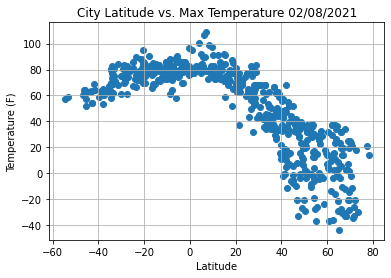

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["temp"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Max Temperature.png")
# Show plot
plt.show()


## Latitude vs. Humidity Plot

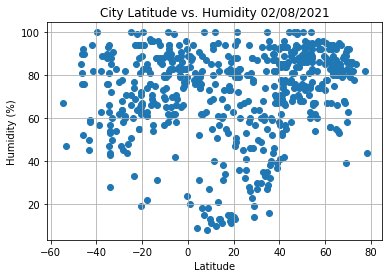

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["humidity"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Humidity.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

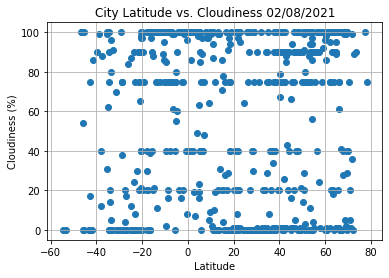

In [19]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["cloudiness"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Cloudiness.png")
# Show plot

## Latitude vs. Wind Speed Plot

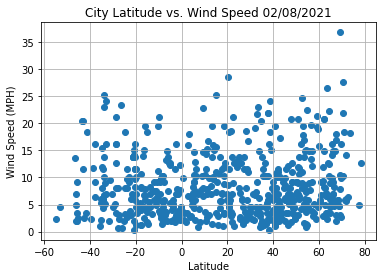

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["wind_speed"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Wind Speed.png")
# Show plot

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["latitude"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["latitude"] < 0]


In [22]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    rst = {round(st.pearsonr(x, y)[0],2)}
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    
#     if float({round(st.pearsonr(x, y)[0],2)}) < -.5:
#         print("There is a Strong Negative Correlation")
#     elif float({round(st.pearsonr(x, y)[0],2)}) < -.3 :
#         print("There is a Negative Correlation") 
#     elif float({round(st.pearsonr(x, y)[0],2)}) < .3 :
#         print("There is a No Correlation")
#     elif float({round(st.pearsonr(x, y)[0],2)}) < .3 :
#         print("There is a Positive Correlation")    
#     else:
#         print("There is a Strong Positive Correlation")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
    
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86
y = -1.49x + 96.16
Strong Negative Correlation between Max Temp and Latitude


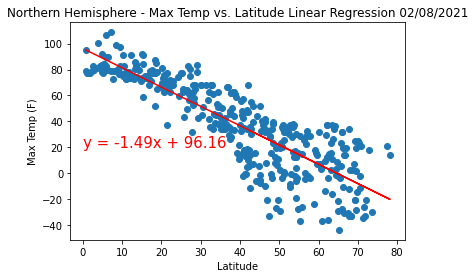

In [23]:
# Call an function #1
equation = linear_agression(northern_hemisphere["latitude"], northern_hemisphere["temp"])
# Call an function #2
annotate(equation, 0, 20)
# Set a title
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"Strong Negative Correlation between Max Temp and Latitude")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.6
y = 0.4x + 83.56
Strong Positive Correlation between Max Temp and Latitude


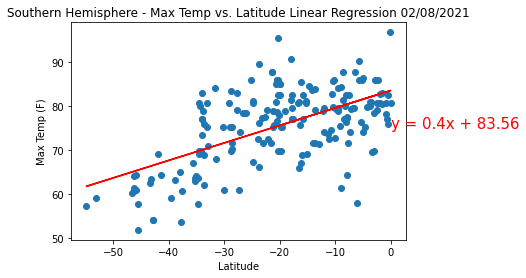

In [24]:
# Call an function #1
equation = linear_agression(southern_hemisphere["latitude"], southern_hemisphere["temp"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"Strong Positive Correlation between Max Temp and Latitude")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35
y = 0.39x + 56.11
Positive Correlation between Humidity and Latitude


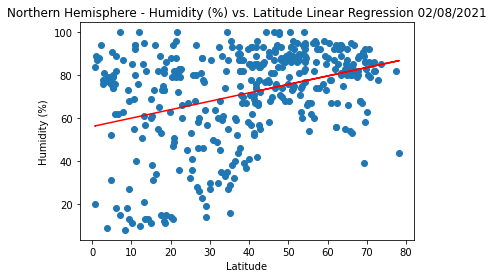

In [25]:
# Call an function #1
equation = linear_agression(northern_hemisphere["latitude"], northern_hemisphere["humidity"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"Positive Correlation between Humidity and Latitude")

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19
y = 0.25x + 78.59
No Correlation between Humidity and Latitude


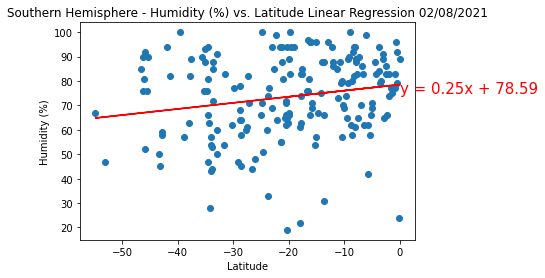

In [26]:
# Call an function #1
equation = linear_agression(southern_hemisphere["latitude"], southern_hemisphere["humidity"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"No Correlation between Humidity and Latitude")

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06
y = 0.13x + 46.07
Positive Correlation between Humidity and Latitude 


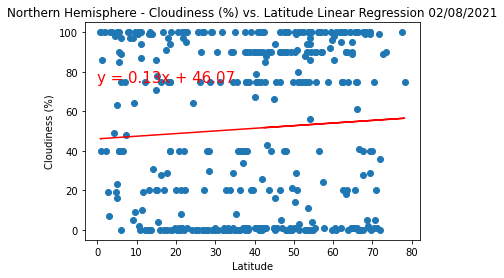

In [27]:
# Call an function #1
equation = linear_agression(northern_hemisphere["latitude"], northern_hemisphere["cloudiness"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"Positive Correlation between Humidity and Latitude ")

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.32
y = 0.97x + 77.53
Positive Correlation between Cloudiness and Latitude


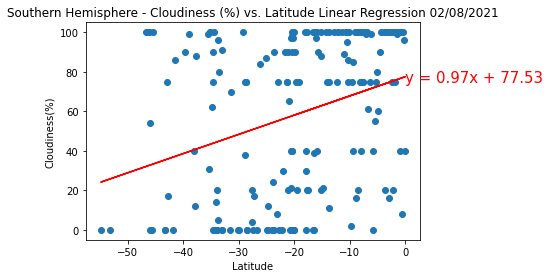

In [28]:
# Call an function #1
equation = linear_agression(southern_hemisphere["latitude"], southern_hemisphere["cloudiness"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"Positive Correlation between Cloudiness and Latitude")

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness(%)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09
y = 0.03x + 7.42
No Correlation between Wind Speed and Latitude


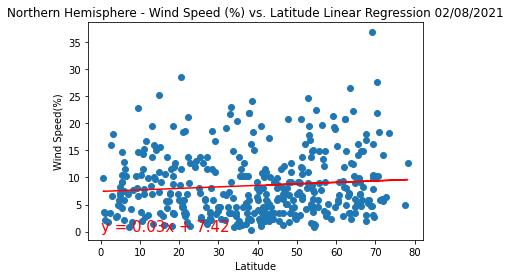

In [29]:
# Call an function #1
equation = linear_agression(northern_hemisphere["latitude"], northern_hemisphere["wind_speed"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title


plt.title(f'Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"No Correlation between Wind Speed and Latitude")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed(%)")
# Save the figure
plt.savefig("../3_output_data/northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15
y = -0.06x + 6.66
No Correlation between Wind Speed and Latitude


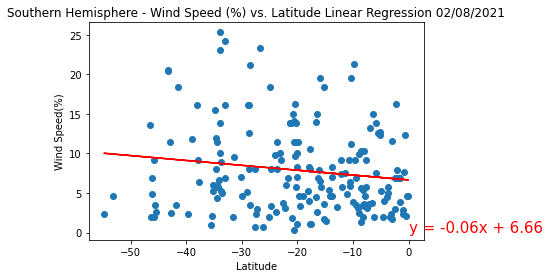

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["latitude"], southern_hemisphere["wind_speed"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title(f'Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
print(f"No Correlation between Wind Speed and Latitude")

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed(%)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

# Conclusion from a one day weather study 
For over 500 cities around the globe

For the date and time that this study was done there is just a
weak or no correlation except for the difference in temperature 
in the Northern Hemisphere. The difference in temperature between 
the cities at the equater and the cities that are farther to the 
north do have a strong correlation.

Since the correlation is weak in 7 of 8 catagories this study 
should be continued for a larger sample size to see any long term tremds